In [1]:
# Core
import numpy as np
import pandas as pd
import math
from scipy.stats import randint as sp_randint

# Plots
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import pandas_profiling

# Models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# Train
from sklearn.model_selection import train_test_split

# Metrics
from sklearn import metrics
from sklearn.metrics import recall_score, precision_score, roc_auc_score
from yellowbrick.regressor import PredictionError

/Users/kumarashok/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/Users/kumarashok/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
# Adjust pandas display and formatting settings

# Remove scientific notations and display numbers with 2 decimal points instead
pd.options.display.float_format = '{:,.3f}'.format        

# Increase cell width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

# Update default style and size of charts
plt.style.use('ggplot')

# Increase max number of rows and columns to display in pandas tables
pd.set_option('display.max_columns', 500)           
pd.set_option('display.max_rows', 500) 

# Exploratory Data Analysis 

## 1. Univariate Analysis

In [5]:
df = pd.read_csv("concrete.csv")
df

cement    slag     ash   water  superplastic  coarseagg  fineagg  age  \
0    141.300 212.000   0.000 203.500         0.000    971.800  748.500   28   
1    168.900  42.200 124.300 158.300        10.800  1,080.800  796.200   14   
2    250.000   0.000  95.700 187.400         5.500    956.900  861.200   28   
3    266.000 114.000   0.000 228.000         0.000    932.000  670.000   28   
4    154.800 183.400   0.000 193.300         9.100  1,047.400  696.700   28   
...      ...     ...     ...     ...           ...        ...      ...  ...   
1025 135.000   0.000 166.000 180.000        10.000    961.000  805.000   28   
1026 531.300   0.000   0.000 141.800        28.200    852.100  893.700    3   
1027 276.400 116.000  90.300 179.600         8.900    870.100  768.300   28   
1028 342.000  38.000   0.000 228.000         0.000    932.000  670.000  270   
1029 540.000   0.000   0.000 173.000         0.000  1,125.000  613.000    7   

      strength  
0       29.890  
1       23.510  
2       29.220  
3       45.850  
4       18.290  
...        ...  
1025    13.290  
1026    41.300  
1027    44.280  
1028    55.060  
1029    52.610  

[1030 rows x 9 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [7]:
df.isnull().sum().sum()

0

In [8]:
df.describe().T

count    mean     std     min     25%     50%       75%  \
cement       1,030.000 281.168 104.506 102.000 192.375 272.900   350.000   
slag         1,030.000  73.896  86.279   0.000   0.000  22.000   142.950   
ash          1,030.000  54.188  63.997   0.000   0.000   0.000   118.300   
water        1,030.000 181.567  21.354 121.800 164.900 185.000   192.000   
superplastic 1,030.000   6.205   5.974   0.000   0.000   6.400    10.200   
coarseagg    1,030.000 972.919  77.754 801.000 932.000 968.000 1,029.400   
fineagg      1,030.000 773.580  80.176 594.000 730.950 779.500   824.000   
age          1,030.000  45.662  63.170   1.000   7.000  28.000    56.000   
strength     1,030.000  35.818  16.706   2.330  23.710  34.445    46.135   

                   max  
cement         540.000  
slag           359.400  
ash            200.100  
water          247.000  
superplastic    32.200  
coarseagg    1,145.000  
fineagg        992.600  
age            365.000  
strength        82.600

In [9]:
pandas_profiling.ProfileReport(df, title="Pandas Profiling Report")

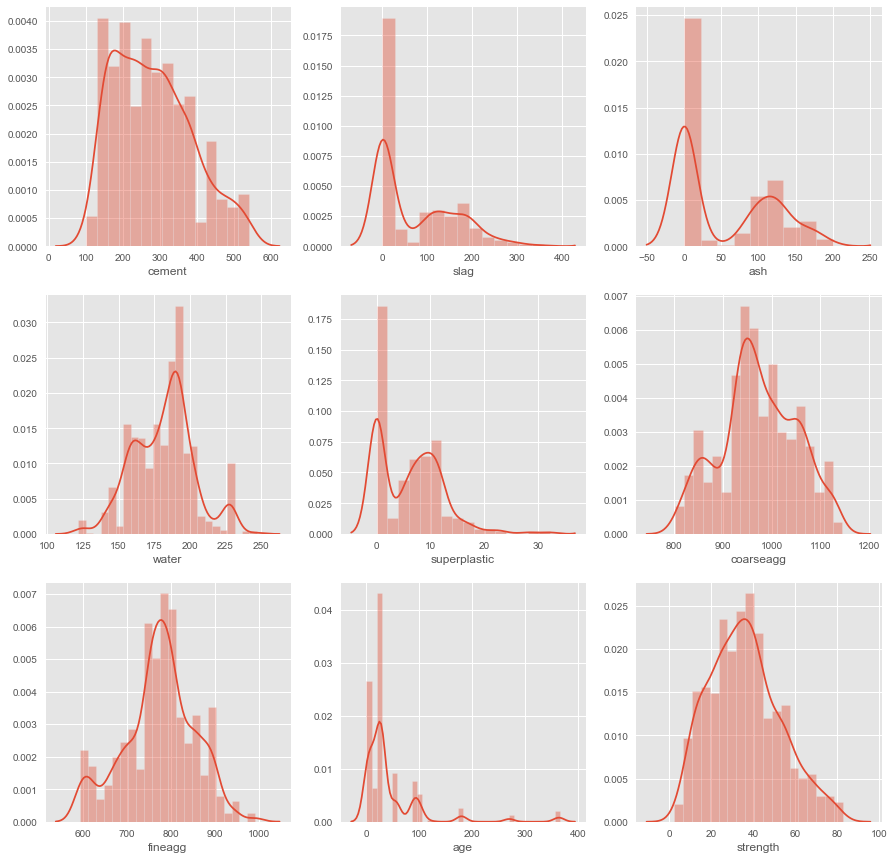

In [9]:
# Analyze distribution of data using histograms
fig, axs = plt.subplots(nrows = 3, ncols = 3, figsize=(15,15))

colIndex = 0 
for col in df.columns:
    sns.distplot(df[col], ax = axs[math.floor(colIndex/3)][colIndex % 3]);
    colIndex += 1

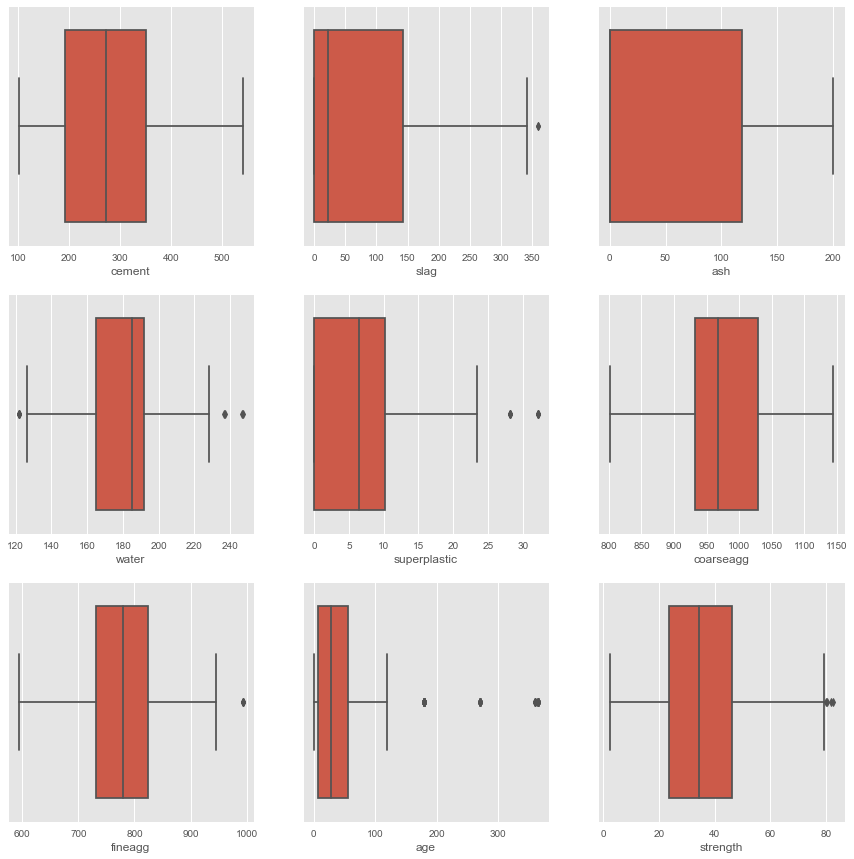

In [8]:
# Outlier detection: Box plots for Continous features
fig, axs = plt.subplots(nrows = 3, ncols = 3, figsize=(15,15))

colIndex = 0 
for col in df.columns:
    sns.boxplot(df[col], ax = axs[math.floor(colIndex/3)][colIndex % 3]);
    colIndex += 1

### Inferences
* There are no missing values in the dataset
* Age, Water, Superplastic and strength have few outliers
* ash is highly left skewed
* slag is highly right skewed
<br/>

# 2. Bivariate Analysis


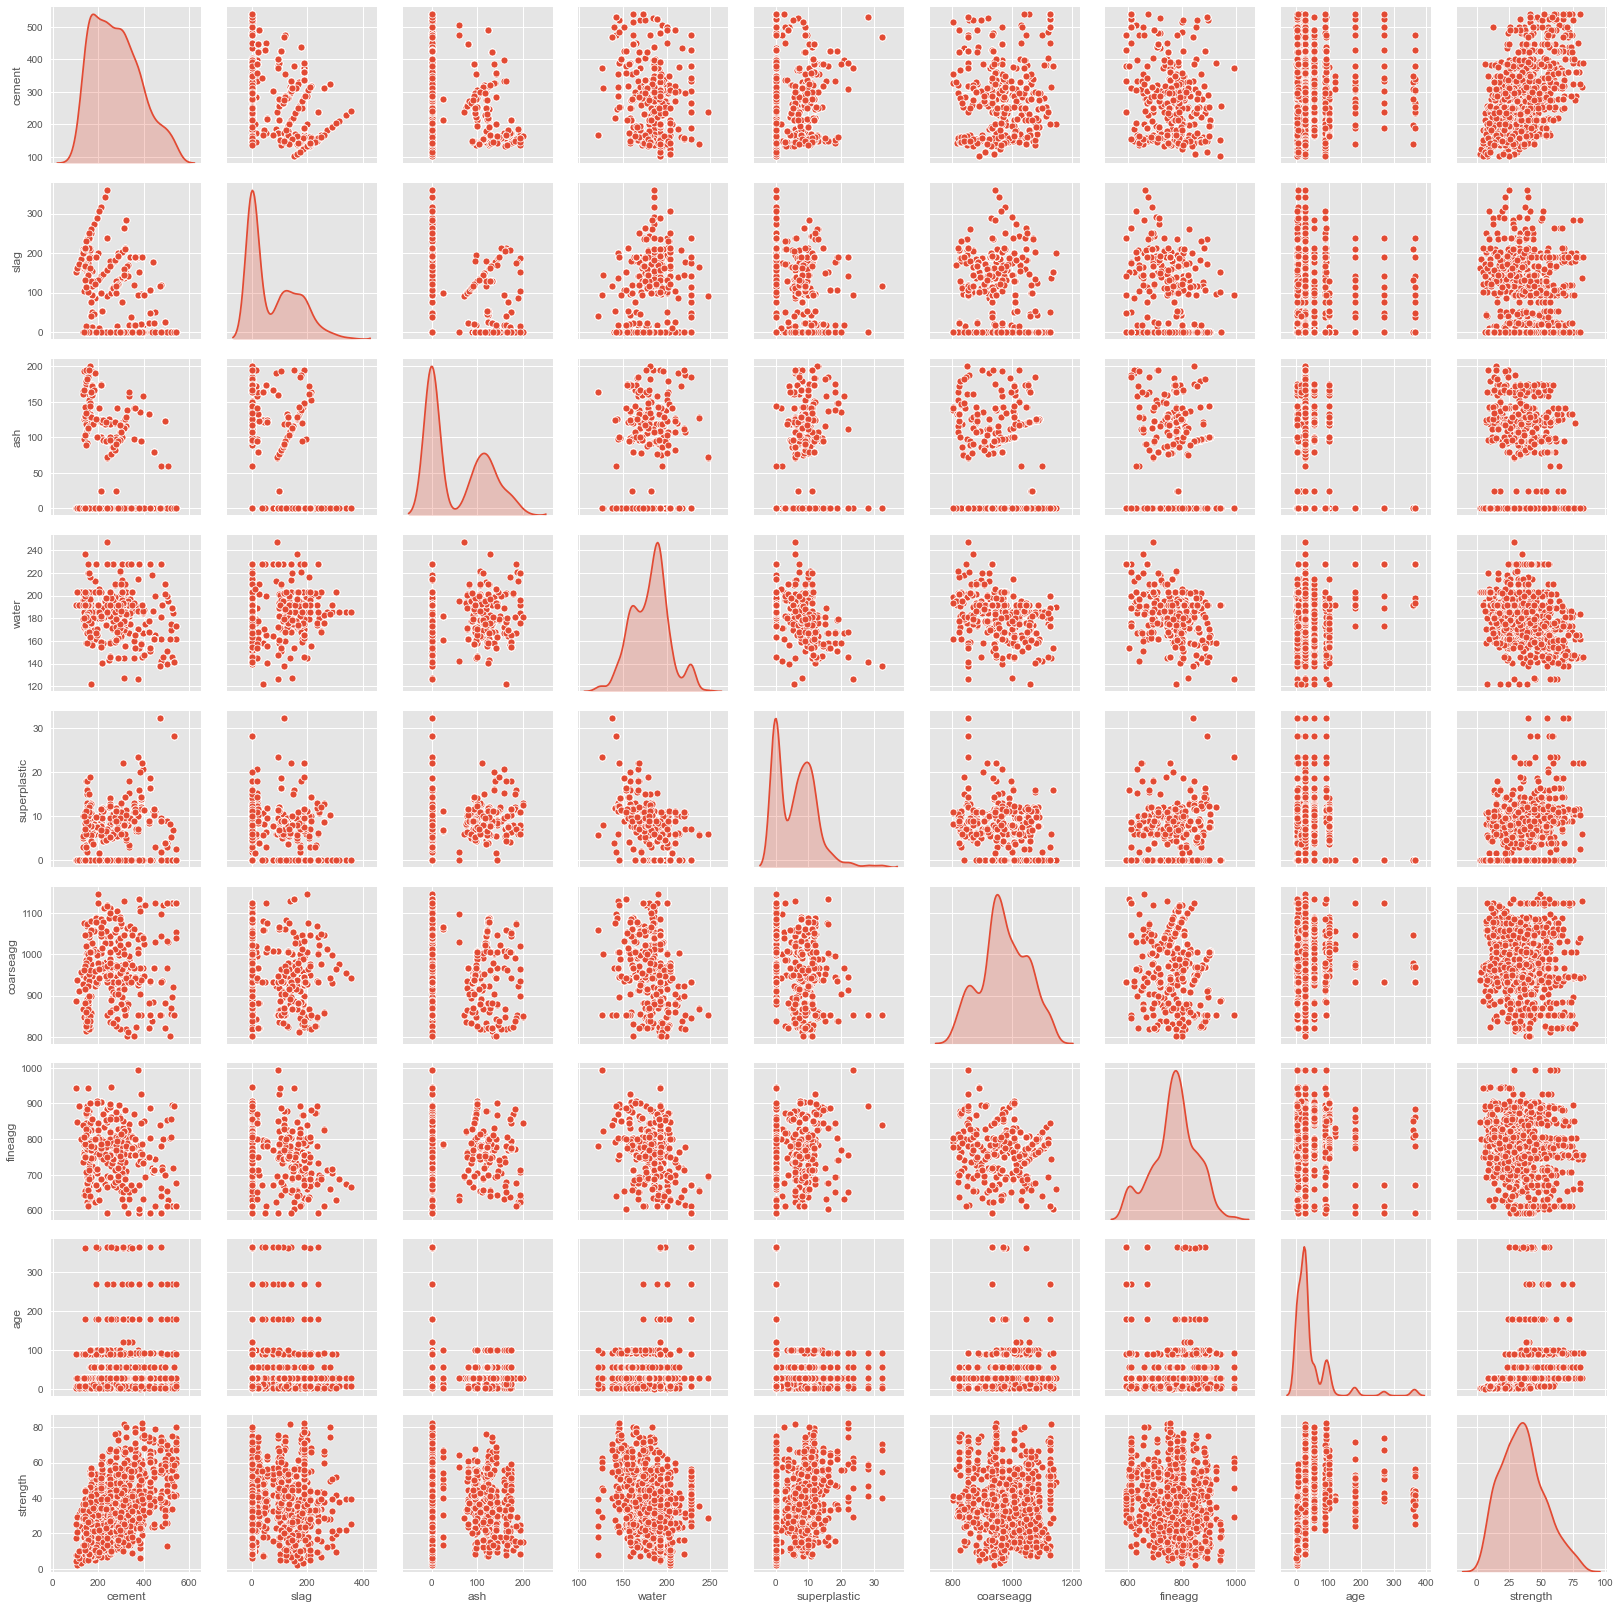

In [12]:
# Pair plot with continuous features
sns.pairplot(df, diag_kind='kde');

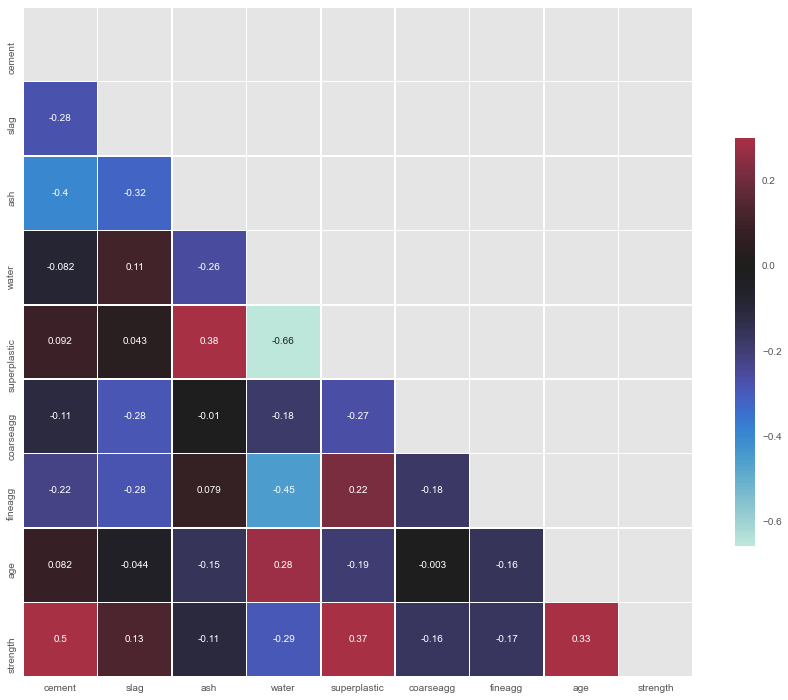

In [15]:
plt.figure(figsize = (15,15))

corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

sns.heatmap(corr, mask=mask, vmax=.3, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

### Inferences
#### Correlation between target and predictor variables
* cement, superplastic, water and age are correlated to strength

#### Correlation between predictor variables
* cement is highly correlated with slag, ash and superplastic
* water is highly correlated with age and fineagg
* ash is highly correlated with slag and superplastic

## 3. Feature Engineering

### a. Drop/Extract features

In [73]:
# Since slag, ash and superplastic are correlated with cement, we can create a new feature combing them
df['slagPerCement'] = df['slag']/df['cement']
df['ashPerCement'] = df['ash']/df['cement']
df['supPlasticPerCement'] = df['superplastic']/df['cement']

# Do the same for water with age and fineagg
df['waterPerAge'] = df['water']/df['age']
df['waterPerFineAgg'] = df['water']/df['fineagg']

# Do the same(but multiply since both have 0's) for ash with slag and superplastic
df['ashAndSlag'] = df['ash']*df['slag']/1000
df['ashAndSupPlastic'] = df['ash']*df['superplastic']/1000

# Not dropping any feature for now

df.describe().T

count    mean     std     min     25%     50%  \
cement              1,030.000 281.168 104.506 102.000 192.375 272.900   
slag                1,030.000  73.896  86.279   0.000   0.000  22.000   
ash                 1,030.000  54.188  63.997   0.000   0.000   0.000   
water               1,030.000 181.567  21.354 121.800 164.900 185.000   
superplastic        1,030.000   6.205   5.974   0.000   0.000   6.400   
coarseagg           1,030.000 972.919  77.754 801.000 932.000 968.000   
fineagg             1,030.000 773.580  80.176 594.000 730.950 779.500   
age                 1,030.000  45.662  63.170   1.000   7.000  28.000   
strength            1,030.000  35.818  16.706   2.330  23.710  34.445   
slagPerCement       1,030.000   0.348   0.468   0.000   0.000   0.054   
ashPerCement        1,030.000   0.259   0.345   0.000   0.000   0.000   
supPlasticPerCement 1,030.000   0.025   0.024   0.000   0.000   0.025   
waterPerAge         1,030.000  15.220  20.213   0.529   3.183   6.632   
waterPerFineAgg     1,030.000   0.239   0.048   0.128   0.209   0.233   
ashAndSlag          1,030.000   2.219   5.817   0.000   0.000   0.000   
ashAndSupPlastic    1,030.000   0.480   0.645   0.000   0.000   0.000   

                          75%       max  
cement                350.000   540.000  
slag                  142.950   359.400  
ash                   118.300   200.100  
water                 192.000   247.000  
superplastic           10.200    32.200  
coarseagg           1,029.400 1,145.000  
fineagg               824.000   992.600  
age                    56.000   365.000  
strength               46.135    82.600  
slagPerCement           0.537     1.584  
ashPerCement            0.471     1.430  
supPlasticPerCement     0.040     0.125  
waterPerAge            20.800   200.000  
waterPerFineAgg         0.257     0.384  
ashAndSlag              0.000    36.465  
ashAndSupPlastic        0.916     3.286

### b.  Train Test Split

In [74]:
X = df.drop(columns=['strength'])
y = df['strength']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 1)

### c. Model complexity

#### We will use a linear model rather than a quadratic model for the following reasons:

* There are very few records in the dataset and the number of features is also moderate
* The scatter plot does not seem to show any curvilinear relationship between predictors

## Model Creation and Tuning

### 1. Model Selection

In [136]:
# Function to print score using kfold cross validation
def evaluateModel(model):
    
    kfold = KFold(n_splits=10, random_state=5)
    results = cross_val_score(model, X, y, cv=kfold)
    print("Accuracy: %.3f%% (std. dev: %.3f%%)" % (results.mean()*100.0, results.std()*100.0))
    return results

In [217]:
# Create a dataframe to store results of various models
column_names = ["Regression Model", "Mean Score", "95% Score Range"]
modelsDf = pd.DataFrame(columns = column_names)

In [218]:
# Function to add the model peroformance metrics to a data frame

def addMetricsToDf(modelsDf, index, modelName, results):
    low95Score = (results.mean() - 1.96 * results.std()) * 100
    high95Score = (results.mean() + 1.96 * results.std()) * 100    
    modelsDf.loc[index] = [modelName, 
                           results.mean()*100.0, 
                           "%.2f%% - %.2f%%" % (low95Score, high95Score)]

In [219]:
# Linear Regression
lrModel = LinearRegression()
results = evaluateModel(lrModel)
addMetricsToDf(modelsDf, 0, "Linear", results)

Accuracy: 76.664% (std. dev: 4.572%)


In [220]:
# Ridge Regression
ridgeModel = Ridge()
results = evaluateModel(ridgeModel)
addMetricsToDf(modelsDf, 1, "Ridge", results)

Accuracy: 76.514% (std. dev: 4.735%)


In [221]:
# Lasso Regression
lassoModel = Lasso()
results = evaluateModel(lassoModel)
addMetricsToDf(modelsDf, 2, "Lasso", results)

Accuracy: 75.687% (std. dev: 4.776%)


In [222]:
# Decision Tree
dTreeModel = DecisionTreeRegressor(max_depth=6)
results = evaluateModel(dTreeModel)
addMetricsToDf(modelsDf, 3, "Decision Tree", results)

Accuracy: 80.436% (std. dev: 4.806%)


In [223]:
# Random Forest
rfmodel = RandomForestRegressor()
results = evaluateModel(rfmodel)
addMetricsToDf(modelsDf, 4, "Random Forest", results)

Accuracy: 90.683% (std. dev: 3.074%)


In [224]:
modelsDf

Regression Model  Mean Score  95% Score Range
0           Linear      76.664  67.70% - 85.63%
1            Ridge      76.514  67.23% - 85.79%
2            Lasso      75.687  66.33% - 85.05%
3    Decision Tree      80.436  71.02% - 89.85%
4    Random Forest      90.683  84.66% - 96.71%

### Inference
Random Forest regressor is the best suited model for this dataset. It has the highest 95% confidence interval score range.

### 2. Model Tuning

In [225]:
column_names = ["Regression Model", "Mean Score"]
tunedDf = pd.DataFrame(columns = column_names)

In [226]:
# Tune the decision tree model
dTreeTuned = DecisionTreeRegressor()

param_dist={'criterion': ["mse", "mae"],
            'max_depth' : [3, None],
            'min_samples_leaf': sp_randint(1, 5),
            'max_features': [4, None],
            'min_samples_split': sp_randint(2, 6)}

randomCV = RandomizedSearchCV(dTreeTuned, param_distributions=param_dist, n_jobs=4, n_iter=15)
randomCV.fit(X, y)
randomCV.best_score_

0.841113342539715

In [227]:
# Add the models score to the models data frame
tunedDf.loc[0] = modelsDf[["Regression Model", "Mean Score"]].loc[3]
tunedDf.loc[1] = ["Decision Tree Tuned", 
                       randomCV.best_score_*100.0]

In [228]:
# Tune the Ridge model
ridgeTuned = Ridge()

param_dist = {"alpha": [1, 10, 100],
              "solver": ['svd', 'sag', 'auto'],
              "normalize": [True, False]}

randomCV = RandomizedSearchCV(ridgeTuned, param_distributions=param_dist, n_jobs=4, n_iter=15)
randomCV.fit(X, y)
randomCV.best_score_

0.7700691598115228

In [229]:
# Add the models score to the models data frame
modelsDf.loc[6] = ["Ridge Tuned", 
                       randomCV.best_score_*100.0, '']
tunedDf.loc[2] = modelsDf[["Regression Model", "Mean Score"]].loc[1]
tunedDf.loc[3] = ["Ridge Tuned", 
                       randomCV.best_score_*100.0]

In [230]:
# Compare the tuned models performance
tunedDf

Regression Model  Mean Score
0        Decision Tree      80.436
1  Decision Tree Tuned      84.111
2                Ridge      76.514
3          Ridge Tuned      77.007